In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('./data/scientists.csv')

In [5]:
df

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [7]:
df['Occupation'].isin(['Chemist'])    #isin 케미스트가 포함되있는지 아닌지

0     True
1    False
2    False
3     True
4    False
5    False
6    False
7    False
Name: Occupation, dtype: bool

In [8]:
df[df['Occupation'].isin(['Chemist']) ]

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist


In [9]:
df[~df['Occupation'].isin(['Chemist']) ]    #  not isin     아닌거  chemist 포함안된거 출력 

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [10]:
df['sex']=['male','male','male','male','female','female','female','female']
df.head()

,Name,Born,Died,Age,Occupation,sex
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,male
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,male
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,male
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,male
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,female


In [13]:
df['sex(replace)']=df['sex'].replace('male',1).replace('female',0) #df['sex']의 칼럼에서 male을 1로 바꾸고 
                                                                #female을 0으로 바꾸겠다 그러고 sex(replace)칼럼에 넣어주겠다

In [14]:
df.head()

,Name,Born,Died,Age,Occupation,sex,sex(replace)
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,male,1
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,male,1
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,male,1
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,male,1
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,female,0


In [15]:
df['sex(replace)']

0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    0
Name: sex(replace), dtype: int64

In [16]:
df.dtypes  #오브젝트형이면 연산을 못함 -> Born을 시간형식으로 바꿔줘야함

Name            object
Born            object
Died            object
Age              int64
Occupation      object
sex             object
sex(replace)     int64
dtype: object

In [17]:
df['Born']

0    1920-07-25
1    1876-06-13
2    1820-05-12
3    1867-11-07
4    1907-05-27
5    1813-03-15
6    1912-06-23
7    1777-04-30
Name: Born, dtype: object

In [23]:
born_datetime=pd.to_datetime(df['Born'],format = '%Y-%m-%d')    #형식변경 

In [19]:
# 예를들어 
str_date= '20220707' #이렇게 날짜가 적혀있으면
pd.to_datetime(str_date,format='%Y%m%d')   #이렇게 적어줘야함 (포맷뒤에쓸때 -안쓰고)

Timestamp('2022-07-07 00:00:00')

In [20]:
# 예를들어 
str_date= '2022/07/07' #이렇게 날짜가 적혀있으면
pd.to_datetime(str_date,format='%Y/%m/%d')   #이렇게 적어줘야함 (포맷뒤에쓸때 /으로)

Timestamp('2022-07-07 00:00:00')

In [24]:
born_datetime=pd.to_datetime(df['Born'],format = '%Y-%m-%d')
died_datetime=pd.to_datetime(df['Died'],format = '%Y-%m-%d')

In [26]:
born_datetime

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [27]:
# 날짜에 대한 연산을 하려고 할때 이렇게 데이트형식으로 바꿔야됨 
df['Died']-df['Born']    #str형식에서는 연산이 안됨 -> 데이트타임형식으로 변경해서 해야함

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [28]:
df['born_dt'],df['died_dt']=born_datetime,died_datetime  # 데이트타임으로 포맷변경한거를 칼럼에 추가한거

In [31]:
df.head()

,Name,Born,Died,Age,Occupation,sex,sex(replace),born_dt,died_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,male,1,1920-07-25,1958-04-16
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,male,1,1876-06-13,1937-10-16
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,male,1,1820-05-12,1910-08-13
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,male,1,1867-11-07,1934-07-04
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,female,0,1907-05-27,1964-04-14


In [30]:
df['died_dt']-df['born_dt']     #데이트타임으로 형식변경해서 연산하니까 연산이 됨 

0   13779 days
1   22404 days
2   32964 days
3   24345 days
4   20777 days
5   16529 days
6   15324 days
7   28422 days
dtype: timedelta64[ns]

In [33]:
df['age_days_dt']=df['died_dt']-df['born_dt']

In [36]:
#year 만 추출
df['died_dt'].dt.year

0    1958
1    1937
2    1910
3    1934
4    1964
5    1858
6    1954
7    1855
Name: died_dt, dtype: int64

In [37]:
#month만 추출
df['died_dt'].dt.month

0     4
1    10
2     8
3     7
4     4
5     6
6     6
7     2
Name: died_dt, dtype: int64

In [38]:
#Ex 죽은연도 - 태어난연도
df['died_dt'].dt.year-df['born_dt'].dt.year

0    38
1    61
2    90
3    67
4    57
5    45
6    42
7    78
dtype: int64

In [46]:
#### 드랍 : 필요없는 데이터 날리기
df_drop_row=df.drop(['Born','Died'],axis=1) #칼럼단위로 날리려면 뒤에 꼭!!!!!! axis=1 붙여주기
                                    #드랍을 할때는 항상 변수이름 다르게 지정하기 
                                    #원래데이터 사라짐 !!

In [47]:
df_drop_row.head(1)

,Name,Age,Occupation,sex,sex(replace),born_dt,died_dt,age_days_dt
0,Rosaline Franklin,37,Chemist,male,1,1920-07-25,1958-04-16,13779 days


In [43]:
df.head(1)

,Name,Born,Died,Age,Occupation,sex,sex(replace),born_dt,died_dt,age_days_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,male,1,1920-07-25,1958-04-16,13779 days


In [44]:
## 로우단위로 데이터 날리기
df.index

RangeIndex(start=0, stop=8, step=1)

In [48]:
df_drop_index=df.drop([3,6],axis=0)   #로우단위로 날릴때 뒤에 axis=0은 생략가능

In [49]:
df_drop_index

,Name,Born,Died,Age,Occupation,sex,sex(replace),born_dt,died_dt,age_days_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,male,1,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,male,1,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,male,1,1820-05-12,1910-08-13,32964 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,female,0,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,female,0,1813-03-15,1858-06-16,16529 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,female,0,1777-04-30,1855-02-23,28422 days


### 피벗테이블 만들기

In [51]:
data=pd.read_csv('data\@preprocessing_data_member01.csv')

In [52]:
data.head()

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문연도,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일
0,0,100304734@n,1.0,0.0,0.0,0.0,1.0,0.0,1,103300,...,2019.0,5.0,9.0,Thursday,14.0,2019-05-09 00:00:00,2019.0,5.0,9.0,Thursday
1,1,1003409866@k,62.0,0.0,0.0,0.0,1.0,0.0,18,4303880,...,2019.0,5.0,28.0,Tuesday,16.0,2019-01-07 00:00:00,2019.0,1.0,7.0,Monday
2,2,100381931@n,5.0,0.0,0.0,0.0,0.0,1.0,3,71050,...,2019.0,2.0,10.0,Sunday,21.0,2018-10-31 00:00:00,2018.0,10.0,31.0,Wednesday
3,3,1004498382@k,1.0,0.0,0.0,0.0,1.0,0.0,1,76400,...,2019.0,1.0,9.0,Wednesday,12.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
4,4,1004547839@k,4.0,1.0,0.0,0.0,0.0,0.0,1,360800,...,2019.0,1.0,9.0,Wednesday,13.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday


In [53]:
data.shape  #로우 5000여개 칼럼 36개

(4924, 36)

In [54]:
data.columns  #이렇게 보고 뭐기준으로 뭐를 볼건지 ~~~정하면됨

Index(['Unnamed: 0', 'ID', '총구매수량_x', '기타품목구매비율', '수저류구매비율', '실링구매비율',
       '용기류구매비율', '위생용품구매비율', '총구매횟수', '총판매액', '총할인금액', '총순수이익', '나이',
       '사용가능 적립금', '성별', '최종접속일', '최종주문일', '유입경로', '유입기기', '회원 가입일', '사업자구분',
       '회원구분', '지역', '세부지역', '주소', '최종주문일(clean)', '최종주문연도', '최종주문월', '최종주문일자',
       '최종주문요일', '최종주문시간', '회원가입일(clean)', '가입연도', '가입월', '가입일자', '가입요일'],
      dtype='object')

In [56]:
data.groupby('최종주문요일')['총구매횟수'].mean() #최종주문요일로 묶어준다음 '총구매횟수'칼럼이 궁금해

최종주문요일
Friday       4.135870
Monday       3.842661
Saturday     2.895735
Sunday       3.699588
Thursday     4.484615
Tuesday      4.107296
Wednesday    4.506878
Name: 총구매횟수, dtype: float64

In [57]:
data.groupby('최종주문요일')['총구매횟수'].sum() 
#그룹바이는 시리즈로 나옴

최종주문요일
Friday       3044
Monday       3639
Saturday      611
Sunday        899
Thursday     4081
Tuesday      3828
Wednesday    4259
Name: 총구매횟수, dtype: int64

In [58]:
data.groupby(['최종주문요일','성별'])['총구매횟수'].mean()   #주문요일별 성별에 따른 구매횟수

최종주문요일     성별
Friday     남자     3.286982
           여자    13.700000
Monday     남자     3.375431
           여자     9.197368
Saturday   남자     2.675127
           여자     6.000000
Sunday     남자     3.103604
           여자    10.000000
Thursday   남자     3.750588
           여자    14.883333
Tuesday    남자     3.628339
           여자     9.915493
Wednesday  남자     3.776897
           여자    14.903226
Name: 총구매횟수, dtype: float64

In [59]:
# 피벗테이블  #데이터프레임으로 나옴
#최종 주문요일에 따른 총 구매횟수
pd.pivot_table(data=data, index='최종주문요일', values='총구매횟수')   #뒤에aggfunc안치면 디폴트로 mean이적용

,총구매횟수
최종주문요일,
Friday,4.135870
Monday,3.842661
Saturday,2.895735
Sunday,3.699588
Thursday,4.484615
Tuesday,4.107296
Wednesday,4.506878


In [60]:
pd.pivot_table(data=data, index='최종주문요일', values='총구매횟수',aggfunc='sum')

,총구매횟수
최종주문요일,
Friday,3044
Monday,3639
Saturday,611
Sunday,899
Thursday,4081
Tuesday,3828
Wednesday,4259


In [61]:
#data.groupby(['최종주문요일','성별'])['총구매횟수'].mean() 얘를 피벗테이블로 만들기

pd.pivot_table(data=data, index='최종주문요일', columns='성별',values='총구매횟수')

성별,남자,여자
최종주문요일,,
Friday,3.286982,13.700000
Monday,3.375431,9.197368
Saturday,2.675127,6.000000
Sunday,3.103604,10.000000
Thursday,3.750588,14.883333
Tuesday,3.628339,9.915493
Wednesday,3.776897,14.903226


In [68]:
pd.pivot_table(data=data, index='성별', columns='최종주문요일',values='총구매횟수')

최종주문요일,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
성별,,,,,,,
남자,3.286982,3.375431,2.675127,3.103604,3.750588,3.628339,3.776897
여자,13.700000,9.197368,6.000000,10.000000,14.883333,9.915493,14.903226


In [69]:
pd.pivot_table(data=data, index=['성별','최종주문요일'],values='총구매횟수')

총구매횟수
성별 최종주문요일              
남자 Friday      3.286982
   Monday      3.375431
   Saturday    2.675127
   Sunday      3.103604
   Thursday    3.750588
   Tuesday     3.628339
   Wednesday   3.776897
여자 Friday     13.700000
   Monday      9.197368
   Saturday    6.000000
   Sunday     10.000000
   Thursday   14.883333
   Tuesday     9.915493
   Wednesday  14.903226

In [171]:
[data.sort_values(by=['최종주문연도'],ascending=False)==2019]

<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
C:\Users\heysunn\AppData\Local\Temp\ipykernel_15880\1898448512.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  [data.sort_values(by=['최종주문연도'],ascending=False)==2019]['최종주문연도']
C:\Users\heysunn\AppData\Local\Temp\ipykernel_15880\1898448512.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  [data.sort_values(by=['최종주문연도'],ascending=False)==2019]['최종주문연도']
C:\Users\heysunn\AppData\Local\Temp\ipykernel_15880\1898448512.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  [data.sort_values(by=['최종주문연도'],ascending=False)==2019]['최종주문연도']


TypeError: list indices must be integers or slices, not str

In [172]:
data[data['최종주문연도']==2019]['최종주문연도']

0       2019.0
1       2019.0
2       2019.0
3       2019.0
4       2019.0
         ...  
4917    2019.0
4918    2019.0
4920    2019.0
4921    2019.0
4922    2019.0
Name: 최종주문연도, Length: 2959, dtype: float64

In [79]:
change_column=pd.pivot_table(data=data, index='최종주문요일', columns='성별',values='총구매횟수').T

In [83]:
change_column=change_column[['Monday', 'Tuesday','Wednesday', 'Thursday', 
       'Friday','Saturday','Sunday']]   #이렇게 칼럼 바꿀수 있음 순서 

In [84]:
change_column

최종주문요일,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
성별,,,,,,,
남자,3.375431,3.628339,3.776897,3.750588,3.286982,2.675127,3.103604
여자,9.197368,9.915493,14.903226,14.883333,13.700000,6.000000,10.000000


In [85]:
## 1
data.head(7)

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문연도,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일
0,0,100304734@n,1.0,0.0,0.0,0.0,1.00,0.00,1,103300,...,2019.0,5.0,9.0,Thursday,14.0,2019-05-09 00:00:00,2019.0,5.0,9.0,Thursday
1,1,1003409866@k,62.0,0.0,0.0,0.0,1.00,0.00,18,4303880,...,2019.0,5.0,28.0,Tuesday,16.0,2019-01-07 00:00:00,2019.0,1.0,7.0,Monday
2,2,100381931@n,5.0,0.0,0.0,0.0,0.00,1.00,3,71050,...,2019.0,2.0,10.0,Sunday,21.0,2018-10-31 00:00:00,2018.0,10.0,31.0,Wednesday
3,3,1004498382@k,1.0,0.0,0.0,0.0,1.00,0.00,1,76400,...,2019.0,1.0,9.0,Wednesday,12.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
4,4,1004547839@k,4.0,1.0,0.0,0.0,0.00,0.00,1,360800,...,2019.0,1.0,9.0,Wednesday,13.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
5,5,1004714862@k,2.0,0.0,0.0,0.0,1.00,0.00,2,108110,...,2019.0,4.0,12.0,Friday,16.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
6,6,10055065@n,4.0,0.0,0.0,0.0,0.75,0.25,1,200480,...,2018.0,10.0,22.0,Monday,16.0,2018-10-22 00:00:00,2018.0,10.0,22.0,Monday


In [86]:
data.tail(7)

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문연도,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일
4917,4929,zoo71h,4.0,0.000,0.000,0.0,0.500,0.500,2,174670,...,2019.0,4.0,15.0,Monday,10.0,2019-03-19 00:00:00,2019.0,3.0,19.0,Tuesday
4918,4930,zuingong73,12.0,0.000,0.167,0.0,0.417,0.417,5,464670,...,2019.0,1.0,29.0,Tuesday,16.0,2018-08-15 00:00:00,2018.0,8.0,15.0,Wednesday
4919,4931,zxvnm07,2.0,0.000,0.000,0.0,0.500,0.500,1,94380,...,2018.0,10.0,30.0,Tuesday,16.0,2018-10-30 00:00:00,2018.0,10.0,30.0,Tuesday
4920,4932,zxxz60,23.0,0.000,0.000,0.0,1.000,0.000,6,1341280,...,2019.0,5.0,23.0,Thursday,14.0,2019-03-29 00:00:00,2019.0,3.0,29.0,Friday
4921,4933,zzar2000,27.0,0.000,0.148,0.0,0.778,0.074,19,1534750,...,2019.0,5.0,27.0,Monday,7.0,2018-11-01 00:00:00,2018.0,11.0,1.0,Thursday
4922,4934,zzbbwmf,15.0,0.000,0.067,0.0,0.933,0.000,6,1160550,...,2019.0,4.0,30.0,Tuesday,17.0,2018-10-16 00:00:00,2018.0,10.0,16.0,Tuesday
4923,4935,zzzxkxk91,3.0,0.333,0.000,0.0,0.667,0.000,1,153650,...,2018.0,1.0,3.0,Wednesday,14.0,2018-01-03 00:00:00,2018.0,1.0,3.0,Wednesday


In [87]:
### 2번
pd.pivot_table(data=data, index=['유입경로','성별'], values='총판매액',aggfunc='sum')

총판매액
유입경로    성별           
SNS광고   남자  236353380
        여자  123054120
기타      남자  134297400
        여자   35130480
블로그광고   남자  224170190
        여자   26304800
신문광고    남자   51299470
        여자     684760
유튜브광고   남자  300015340
        여자    4534500
이메일광고   남자  291784180
        여자   39729270
인터넷검색   남자  124873620
        여자   65652620
인터넷기사광고 남자  264904990
        여자   46971770
잡지광고    남자  171832940
        여자  110956930
전단지광고   남자  218872860
        여자   84041760
지인추천    남자  189238140
        여자   62722180
카카오톡광고  남자  113366860
        여자   57498490

In [88]:
### 3번
data.describe()

,Unnamed: 0,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,총할인금액,총순수이익,나이,사용가능 적립금,최종주문연도,최종주문월,최종주문일자,최종주문시간,가입연도,가입월,가입일자
count,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4.924000e+03,4.924000e+03,4.924000e+03,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000
mean,2467.350122,10.370431,0.046973,0.040044,0.020072,0.692333,0.200570,4.135053,6.048520e+05,7.483145e+04,2.476685e+05,39.293867,2126.745735,2018.558083,5.359261,16.875711,13.903737,2018.266044,5.720349,15.908408
std,1424.589929,21.524662,0.158107,0.115471,0.106260,0.292920,0.236628,7.090764,1.360792e+06,1.939142e+05,7.088031e+05,8.544393,4738.568058,0.576538,2.993509,8.734790,4.186792,0.577435,3.437493,8.737182
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,-5.895700e+05,21.000000,-1790.000000,2017.000000,1.000000,1.000000,0.000000,2017.000000,1.000000,1.000000
25%,1234.750000,2.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,9.685000e+04,0.000000e+00,2.701500e+04,32.000000,0.000000,2018.000000,3.000000,9.000000,11.000000,2018.000000,3.000000,8.000000
50%,2467.500000,4.000000,0.000000,0.000000,0.000000,0.714000,0.138000,2.000000,2.044700e+05,2.181000e+04,6.362500e+04,40.000000,1110.000000,2019.000000,5.000000,17.000000,14.000000,2018.000000,5.000000,16.000000
75%,3700.250000,9.000000,0.000000,0.000000,0.000000,1.000000,0.333000,4.000000,5.380450e+05,6.405000e+04,1.813025e+05,46.000000,2350.000000,2019.000000,7.000000,24.000000,17.000000,2019.000000,9.000000,24.000000
max,4935.000000,376.000000,1.000000,1.000000,1.000000,1.000000,1.000000,125.000000,2.848858e+07,3.884210e+06,1.417787e+07,92.000000,125490.000000,2019.000000,12.000000,31.000000,23.000000,2019.000000,12.000000,31.000000


In [117]:
### 4번
data['성별_replace']=data['성별'].replace('남자',1).replace('여자',0)


In [118]:
data['성별_replace']

0       1
1       1
2       1
3       1
4       1
       ..
4919    1
4920    1
4921    0
4922    1
4923    1
Name: 성별_replace, Length: 4924, dtype: int64

KeyError: '0'

In [120]:
data[data['성별_replace']==0 ]

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일,성별_replace
89,89,111681891@n,20.0,0.000,0.050,0.0,0.650,0.300,11,773560,...,2.0,25.0,Monday,16.0,2017-12-19 00:00:00,2017.0,12.0,19.0,Tuesday,0
90,90,11178928@n,1.0,1.000,0.000,0.0,0.000,0.000,1,43500,...,12.0,5.0,Tuesday,13.0,2017-12-05 00:00:00,2017.0,12.0,5.0,Tuesday,0
96,96,11321210@n,12.0,0.000,0.083,0.0,0.750,0.167,8,640230,...,5.0,13.0,Monday,11.0,2018-10-27 00:00:00,2018.0,10.0,27.0,Saturday,0
97,97,113969589@n,16.0,0.000,0.000,0.0,1.000,0.000,7,1030600,...,5.0,27.0,Monday,11.0,2019-04-11 00:00:00,2019.0,4.0,11.0,Thursday,0
103,103,115424915@n,11.0,0.091,0.000,0.0,0.545,0.364,6,430270,...,4.0,5.0,Friday,17.0,2018-04-08 00:00:00,2018.0,4.0,8.0,Sunday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,4903,yunhee1219,22.0,0.000,0.136,0.0,0.682,0.182,7,1496450,...,1.0,26.0,Saturday,21.0,2018-10-01 00:00:00,2018.0,10.0,1.0,Monday,0
4899,4911,ywg9669,13.0,0.000,0.000,0.0,0.846,0.154,7,847790,...,5.0,17.0,Friday,1.0,2018-01-04 00:00:00,2018.0,1.0,4.0,Thursday,0
4906,4918,zagm10,105.0,0.000,0.086,0.0,0.905,0.010,33,7057280,...,6.0,2.0,Sunday,19.0,2018-09-19 00:00:00,2018.0,9.0,19.0,Wednesday,0
4918,4930,zuingong73,12.0,0.000,0.167,0.0,0.417,0.417,5,464670,...,1.0,29.0,Tuesday,16.0,2018-08-15 00:00:00,2018.0,8.0,15.0,Wednesday,0


In [107]:
pd.pivot_table(data=data, index=['가입연도'], values='총판매액',aggfunc='sum')

,총판매액
가입연도,
2017.0,254898910
2018.0,2201762590
2019.0,521629550


In [111]:
data.columns

Index(['Unnamed: 0', 'ID', '총구매수량_x', '기타품목구매비율', '수저류구매비율', '실링구매비율',
       '용기류구매비율', '위생용품구매비율', '총구매횟수', '총판매액', '총할인금액', '총순수이익', '나이',
       '사용가능 적립금', '성별', '최종접속일', '최종주문일', '유입경로', '유입기기', '회원 가입일', '사업자구분',
       '회원구분', '지역', '세부지역', '주소', '최종주문일(clean)', '최종주문연도', '최종주문월', '최종주문일자',
       '최종주문요일', '최종주문시간', '회원가입일(clean)', '가입연도', '가입월', '가입일자', '가입요일',
       '성별_replace'],
      dtype='object')

In [153]:
data['총구매횟수']

0        1
1       18
2        3
3        1
4        1
        ..
4919     1
4920     6
4921    19
4922     6
4923     1
Name: 총구매횟수, Length: 4924, dtype: int64

In [163]:
data.sort_values(by='총구매횟수',ascending=False)['총구매횟수']

2367    125
4903     95
4780     94
1317     89
1106     81
       ... 
2103      1
2104      1
2105      1
2108      1
4923      1
Name: 총구매횟수, Length: 4924, dtype: int64

In [158]:
data['총구매횟수_sort']

0        1
1       18
2        3
3        1
4        1
        ..
4919     1
4920     6
4921    19
4922     6
4923     1
Name: 총구매횟수_sort, Length: 4924, dtype: int64

In [173]:

pd.pivot_table(data=data[data['최종주문연도']==2019], index=['ID'], values=['총구매횟수'])

,총구매횟수
ID,
100304734@n,1
1003409866@k,18
100381931@n,3
1004498382@k,1
1004547839@k,1
...,...
zoo71h,2
zuingong73,5
zxxz60,6


In [139]:
data[data['최종주문연도']==2019]

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일,성별_replace
0,0,100304734@n,1.0,0.0,0.000,0.0,1.000,0.000,1,103300,...,5.0,9.0,Thursday,14.0,2019-05-09 00:00:00,2019.0,5.0,9.0,Thursday,1
1,1,1003409866@k,62.0,0.0,0.000,0.0,1.000,0.000,18,4303880,...,5.0,28.0,Tuesday,16.0,2019-01-07 00:00:00,2019.0,1.0,7.0,Monday,1
2,2,100381931@n,5.0,0.0,0.000,0.0,0.000,1.000,3,71050,...,2.0,10.0,Sunday,21.0,2018-10-31 00:00:00,2018.0,10.0,31.0,Wednesday,1
3,3,1004498382@k,1.0,0.0,0.000,0.0,1.000,0.000,1,76400,...,1.0,9.0,Wednesday,12.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday,1
4,4,1004547839@k,4.0,1.0,0.000,0.0,0.000,0.000,1,360800,...,1.0,9.0,Wednesday,13.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,4929,zoo71h,4.0,0.0,0.000,0.0,0.500,0.500,2,174670,...,4.0,15.0,Monday,10.0,2019-03-19 00:00:00,2019.0,3.0,19.0,Tuesday,1
4918,4930,zuingong73,12.0,0.0,0.167,0.0,0.417,0.417,5,464670,...,1.0,29.0,Tuesday,16.0,2018-08-15 00:00:00,2018.0,8.0,15.0,Wednesday,0
4920,4932,zxxz60,23.0,0.0,0.000,0.0,1.000,0.000,6,1341280,...,5.0,23.0,Thursday,14.0,2019-03-29 00:00:00,2019.0,3.0,29.0,Friday,1
4921,4933,zzar2000,27.0,0.0,0.148,0.0,0.778,0.074,19,1534750,...,5.0,27.0,Monday,7.0,2018-11-01 00:00:00,2018.0,11.0,1.0,Thursday,0


In [174]:
pd.pivot_table(data=data, index='최종주문연도', columns='ID',values='총구매횟수')

ID,100304734@n,1003409866@k,100381931@n,1004498382@k,1004547839@k,1004714862@k,10055065@n,1005540326292754@f,1005861444@k,1005958854@k,...,zlbearlz,zltm0110,zlxm777,zoo71h,zuingong73,zxvnm07,zxxz60,zzar2000,zzbbwmf,zzzxkxk91
최종주문연도,,,,,,,,,,,,,,,,,,,,,
2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
2019.0,1.0,18.0,3.0,1.0,1.0,2.0,NaN,NaN,1.0,2.0,...,NaN,1.0,24.0,2.0,5.0,NaN,6.0,19.0,6.0,NaN


In [175]:
data.sort_values(by='총구매횟수',ascending=False)['총구매횟수']

2367    125
4903     95
4780     94
1317     89
1106     81
       ... 
2103      1
2104      1
2105      1
2108      1
4923      1
Name: 총구매횟수, Length: 4924, dtype: int64

In [182]:
data[data['최종주문연도']==2019][data['총구매횟수']==125]
data[data['최종주문연도']==2019][data['총구매횟수']==95]
data[data['최종주문연도']==2019][data['총구매횟수']==94]
data[data['최종주문연도']==2019][data['총구매횟수']==89]
data[data['최종주문연도']==2019][data['총구매횟수']==81]

C:\Users\heysunn\AppData\Local\Temp\ipykernel_15880\3046931140.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['최종주문연도']==2019][data['총구매횟수']==125]


,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일,성별_replace,총구매횟수_sort
2367,2373,mission1013,309.0,0.081,0.068,0.0,0.676,0.175,125,18373280,...,29.0,Wednesday,12.0,2017-08-09 00:00:00,2017.0,8.0,9.0,Wednesday,0,125


In [184]:
data[data['최종주문연도']==2019][data['총구매횟수']==125]['ID']

C:\Users\heysunn\AppData\Local\Temp\ipykernel_15880\1008973772.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['최종주문연도']==2019][data['총구매횟수']==125]['ID']


2367    mission1013
Name: ID, dtype: object

In [186]:
pd.pivot_table(data=data, index=['최종주문요일'],columns=['유입경로'],values=['총구매횟수'],aggfunc=sum)

총구매횟수                                                          \
유입경로       SNS광고     기타  블로그광고  신문광고  유튜브광고  이메일광고  인터넷검색 인터넷기사광고   잡지광고   
최종주문요일                                                                     
Friday     384.0  158.0  165.0  20.0  308.0  344.0  183.0   349.0  330.0   
Monday     505.0  143.0  265.0  42.0  440.0  614.0  216.0   255.0  279.0   
Saturday   110.0   81.0   79.0   NaN   20.0   20.0   58.0    16.0   79.0   
Sunday     183.0   30.0   51.0  41.0   20.0   71.0   84.0    29.0   68.0   
Thursday   618.0  192.0  257.0  85.0  397.0  563.0  242.0   417.0  279.0   
Tuesday    566.0  150.0  304.0   7.0  479.0  398.0  219.0   438.0  397.0   
Wednesday  380.0  318.0  396.0  29.0  479.0  514.0  246.0   557.0  387.0   

                                
유입경로       전단지광고   지인추천 카카오톡광고  
최종주문요일                          
Friday     336.0  351.0  116.0  
Monday     477.0  177.0  226.0  
Saturday    43.0   79.0   26.0  
Sunday     137.0  122.0   63.0  
Thursday   486.0  263.0  282.0  
Tuesday    278.0  317.0  275.0  
Wednesday  388.0  331.0  234.0

In [187]:
pd.pivot_table(data=data, index=['최종주문요일'],columns=['유입경로'],values=['총구매횟수'],aggfunc=sum)

총구매횟수                                                             \
유입경로        SNS광고          기타       블로그광고       신문광고       유튜브광고       이메일광고   
count    7.000000    7.000000    7.000000   6.000000    7.000000    7.000000   
mean   392.285714  153.142857  216.714286  37.333333  306.142857  360.571429   
std    190.408958   90.547278  124.376732  26.822876  203.997899  234.613055   
min    110.000000   30.000000   51.000000   7.000000   20.000000   20.000000   
25%    281.500000  112.000000  122.000000  22.250000  164.000000  207.500000   
50%    384.000000  150.000000  257.000000  35.000000  397.000000  398.000000   
75%    535.500000  175.000000  284.500000  41.750000  459.500000  538.500000   
max    618.000000  318.000000  396.000000  85.000000  479.000000  614.000000   

                                                                               
유입경로        인터넷검색     인터넷기사광고        잡지광고       전단지광고        지인추천      카카오톡광고  
count    7.000000    7.000000    7.000000    7.000000    7.000000    7.000000  
mean   178.285714  294.428571  259.857143  306.428571  234.285714  174.571429  
std     76.491207  206.997470  135.489764  167.221268  108.509161  104.686607  
min     58.000000   16.000000   68.000000   43.000000   79.000000   26.000000  
25%    133.500000  142.000000  179.000000  207.500000  149.500000   89.500000  
50%    216.000000  349.000000  279.000000  336.000000  263.000000  226.000000  
75%    230.500000  427.500000  358.500000  432.500000  324.000000  254.500000  
max    246.000000  557.000000  397.000000  486.000000  351.000000  282.000000

In [188]:
### 6번
data_2019=data[data['최종주문연도']==2019]  #불린추출로 가져오기
data_2019['ID'].value_counts().sort_values() #실제 고객별로 중복row가 없는지 확인 ->모두 1이라면 중복 x
                                            #다른게 하나라도 있으면 그룹바이 한번더해줘야

100304734@n     1
1027770506@k    1
100381931@n     1
1004498382@k    1
1004547839@k    1
               ..
zoo71h          1
zuingong73      1
zxxz60          1
zamppo2         1
zzbbwmf         1
Name: ID, Length: 2959, dtype: int64

In [189]:
data_2019.sort_values(by='총구매횟수',ascending=False).head()[["ID",'총구매횟수']]
#총구매횟수로 정렬하고 앞머리만 보여주고 거기서 ID와 총구매횟수 칼럼을 가져와

,ID,총구매횟수
2367,mission1013,125
4903,yyk1104,95
4780,wndjdqkqh,94
1317,cmp1220,89
1106,as12,81


In [190]:
###7번
pd.pivot_table(data=data, index=['최종주문요일'],columns=['유입경로'],values=['총구매횟수'],aggfunc=sum)

총구매횟수                                                          \
유입경로       SNS광고     기타  블로그광고  신문광고  유튜브광고  이메일광고  인터넷검색 인터넷기사광고   잡지광고   
최종주문요일                                                                     
Friday     384.0  158.0  165.0  20.0  308.0  344.0  183.0   349.0  330.0   
Monday     505.0  143.0  265.0  42.0  440.0  614.0  216.0   255.0  279.0   
Saturday   110.0   81.0   79.0   NaN   20.0   20.0   58.0    16.0   79.0   
Sunday     183.0   30.0   51.0  41.0   20.0   71.0   84.0    29.0   68.0   
Thursday   618.0  192.0  257.0  85.0  397.0  563.0  242.0   417.0  279.0   
Tuesday    566.0  150.0  304.0   7.0  479.0  398.0  219.0   438.0  397.0   
Wednesday  380.0  318.0  396.0  29.0  479.0  514.0  246.0   557.0  387.0   

                                
유입경로       전단지광고   지인추천 카카오톡광고  
최종주문요일                          
Friday     336.0  351.0  116.0  
Monday     477.0  177.0  226.0  
Saturday    43.0   79.0   26.0  
Sunday     137.0  122.0   63.0  
Thursday   486.0  263.0  282.0  
Tuesday    278.0  317.0  275.0  
Wednesday  388.0  331.0  234.0

In [195]:
###7-2
#판매량이 가장높은 요일
best_day=pd.pivot_table(data=data, index=['최종주문요일'],columns=['유입경로'],
values=['총구매횟수'],aggfunc=sum).sum(axis=1).sort_values(ascending=False).index[0]

pd.pivot_table(data=data, index=['최종주문요일'],columns=['유입경로'],
values=['총구매횟수'],aggfunc=sum).sum(axis=1).sort_values(ascending=False).index[0]
#시리즈는 sort_values에 바이를 넣어줄 필요가 없음
#정렬한거의 [0]

'Wednesday'

In [199]:
pivot_data=pd.pivot_table(data=data, index=['최종주문요일'],columns=['유입경로'],
values=['총구매횟수'],aggfunc=sum)
pd.pivot_table(data=data, index=['최종주문요일'],columns=['유입경로'],
values=['총구매횟수'],aggfunc=sum)

총구매횟수                                                          \
유입경로       SNS광고     기타  블로그광고  신문광고  유튜브광고  이메일광고  인터넷검색 인터넷기사광고   잡지광고   
최종주문요일                                                                     
Friday     384.0  158.0  165.0  20.0  308.0  344.0  183.0   349.0  330.0   
Monday     505.0  143.0  265.0  42.0  440.0  614.0  216.0   255.0  279.0   
Saturday   110.0   81.0   79.0   NaN   20.0   20.0   58.0    16.0   79.0   
Sunday     183.0   30.0   51.0  41.0   20.0   71.0   84.0    29.0   68.0   
Thursday   618.0  192.0  257.0  85.0  397.0  563.0  242.0   417.0  279.0   
Tuesday    566.0  150.0  304.0   7.0  479.0  398.0  219.0   438.0  397.0   
Wednesday  380.0  318.0  396.0  29.0  479.0  514.0  246.0   557.0  387.0   

                                
유입경로       전단지광고   지인추천 카카오톡광고  
최종주문요일                          
Friday     336.0  351.0  116.0  
Monday     477.0  177.0  226.0  
Saturday    43.0   79.0   26.0  
Sunday     137.0  122.0   63.0  
Thursday   486.0  263.0  282.0  
Tuesday    278.0  317.0  275.0  
Wednesday  388.0  331.0  234.0

In [197]:
pd.pivot_table(data=data, index=['최종주문요일'],columns=['유입경로'],
values=['총구매횟수'],aggfunc=sum).sum(axis=1)  #요일별로 총 주문의 합

최종주문요일
Friday       3044.0
Monday       3639.0
Saturday      611.0
Sunday        899.0
Thursday     4081.0
Tuesday      3828.0
Wednesday    4259.0
dtype: float64

In [198]:
pd.pivot_table(data=data, index=['최종주문요일'],columns=['유입경로'],
values=['총구매횟수'],aggfunc=sum).sum(axis=0)   # 유입경로별 총합

       유입경로   
총구매횟수  SNS광고      2746.0
       기타         1072.0
       블로그광고      1517.0
       신문광고        224.0
       유튜브광고      2143.0
       이메일광고      2524.0
       인터넷검색      1248.0
       인터넷기사광고    2061.0
       잡지광고       1819.0
       전단지광고      2145.0
       지인추천       1640.0
       카카오톡광고     1222.0
dtype: float64

In [200]:
#8 
data.groupby('최종주문요일')['총판매액'].mean().sort_values(ascending=False)

최종주문요일
Thursday     701618.560440
Wednesday    677782.095238
Tuesday      615232.703863
Friday       579195.828804
Sunday       549632.510288
Monday       501610.190074
Saturday     431485.876777
Name: 총판매액, dtype: float64

In [202]:
#9
day= data.groupby('최종주문일')['총구매횟수'].sum().sort_values(ascending=True)
idx=day[day==1].index
data.set_index('최종주문일').loc[idx,:]

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일,성별_replace,총구매횟수_sort
최종주문일,,,,,,,,,,,,,,,,,,,,,
2017-01-01 오후 3:38,1250,cgh1385,1.0,0.0,0.0,0.0,1.0,0.0,1,66500,...,1.0,Sunday,15.0,2017-01-01 00:00:00,2017.0,1.0,1.0,Sunday,1,1
2019-01-11 오후 5:48,4461,sook3040,1.0,0.0,0.0,0.0,1.0,0.0,1,56760,...,11.0,Friday,17.0,2019-01-11 00:00:00,2019.0,1.0,11.0,Friday,1,1
2019-01-12 오후 2:09,1531,fa1708,1.0,0.0,0.0,0.0,1.0,0.0,1,68970,...,12.0,Saturday,14.0,2019-01-12 00:00:00,2019.0,1.0,12.0,Saturday,1,1
2019-01-12 오후 5:10,1844,isdu5623,3.0,0.0,0.0,0.0,1.0,0.0,1,257070,...,12.0,Saturday,17.0,2019-01-12 00:00:00,2019.0,1.0,12.0,Saturday,1,1
2019-01-12 오후 8:54,2439,namu4212,1.0,0.0,0.0,0.0,1.0,0.0,1,66500,...,12.0,Saturday,20.0,2018-12-11 00:00:00,2018.0,12.0,11.0,Tuesday,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-01 오후 12:03,813,75488040@n,2.0,0.0,0.0,0.0,1.0,0.0,1,85470,...,1.0,Monday,12.0,2018-10-01 00:00:00,2018.0,10.0,1.0,Monday,1,1
2018-10-05 오후 6:06,331,23413512@n,2.0,0.0,0.0,0.0,0.5,0.5,1,94710,...,5.0,Friday,18.0,2018-10-05 00:00:00,2018.0,10.0,5.0,Friday,1,1
2018-09-28 오후 5:42,544,42078672@n,2.0,0.0,0.0,0.0,0.5,0.5,1,235620,...,28.0,Friday,17.0,2018-09-28 00:00:00,2018.0,9.0,28.0,Friday,1,1


In [203]:
idx

Index(['2017-01-01 오후 3:38', '2019-01-11 오후 5:48', '2019-01-12 오후 2:09',
       '2019-01-12 오후 5:10', '2019-01-12 오후 8:54', '2019-01-13 오후 7:23',
       '2019-01-13 오후 7:32', '2019-01-14 오전 11:33', '2019-01-14 오후 10:33',
       '2019-01-14 오후 1:45',
       ...
       '2018-10-11 오전 2:26', '2018-10-01 오전 10:45', '2018-09-28 오후 12:50',
       '2018-07-14 오후 2:42', '2018-07-20 오후 2:51', '2018-10-01 오후 12:03',
       '2018-10-05 오후 6:06', '2018-09-28 오후 5:42', '2018-07-14 오후 12:46',
       '2018-07-20 오후 1:49'],
      dtype='object', name='최종주문일', length=2373)

In [208]:
data['최종주문일2']=data['최종주문일'].str[:10]
data.groupby('최종주문일2')['총구매횟수'].sum().sort_values()

최종주문일2
2017-01-01       1
2017-12-29       1
2017-12-24       1
2017-12-17       1
2017-12-13       1
              ... 
2019-05-22     725
2019-05-27     879
2019-05-28    1042
2019-05-30    1095
2019-05-29    1177
Name: 총구매횟수, Length: 629, dtype: int64

In [213]:
#for문으로 뽑아올때
#알아두면 좋음

for idx,value in data.iterrows():
    ID=value[1]
    amount=value['총판매액']
    print(ID,amount)

100304734@n 103300
1003409866@k 4303880
100381931@n 71050
1004498382@k 76400
1004547839@k 360800
1004714862@k 108110
10055065@n 200480
1005540326292754@f 60540
1005861444@k 225070
1005958854@k 135240
100738387@n 93720
100738448@n 57500
1008814431@k 67320
1008831959@k 688540
1009216553@k 320470
1013394725@k 38390
1015593605@k 101310
1017481028@k 78390
101803789@n 104000
102242774@n 49700
1024370257@k 394690
1024429813@k 102190
1024848064@k 66500
102567472@n 153710
10261560@n 495900
102764664@n 56760
1027770506@k 49700
10320819@n 2977610
10359143@n 190970
1036830659@k 683960
1037721908@k 57220
1038355240@k 121920
1038469905@k 160890
1038677707@k 607860
1039558032@k 103300
104005455@n 374870
1040253175@k 264760
10405556@n 95230
1040736983@k 59670
10429360@n 118250
104371081@n 113520
104757296@n 231000
1049809143@k 410830
1050417339@k 74600
1050964496@k 19620
10531439@n 92070
1054591641@k 185790
105511281@n 60280
10572859@n 98560
10579328@n 274680
1057945738@k 115070
1059968519@k 98600
106

### 데이터시각화

In [214]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [215]:
pip install seaborn

^C
Note: you may need to restart the kernel to use updated packages.


In [216]:
import seaborn as sns

In [230]:
anscombe=sns.load_dataset('anscombe')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [218]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [219]:
anscombe['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

In [220]:
anscombe.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [221]:
anscombe.groupby('dataset').mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [222]:
anscombe.groupby('dataset').sum()

,x,y
dataset,,
I,99.0,82.51
II,99.0,82.51
III,99.0,82.50
IV,99.0,82.51


In [223]:
anscombe.groupby('dataset').agg({'x':['sum','mean']})

x     
          sum mean
dataset           
I        99.0  9.0
II       99.0  9.0
III      99.0  9.0
IV       99.0  9.0

In [224]:
anscombe.groupby('dataset').agg({'x':['sum','mean'],'y':['mean']})

x              y
          sum mean      mean
dataset                     
I        99.0  9.0  7.500909
II       99.0  9.0  7.500909
III      99.0  9.0  7.500000
IV       99.0  9.0  7.500909

In [232]:
dataset_1=anscombe[anscombe['dataset']=='I']
dataset_2=anscombe[anscombe['dataset']=='II']
dataset_3=anscombe[anscombe['dataset']=='III']
dataset_4=anscombe[anscombe['dataset']=='IV']
dataset_1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [227]:
import matplotlib.pyplot as plt

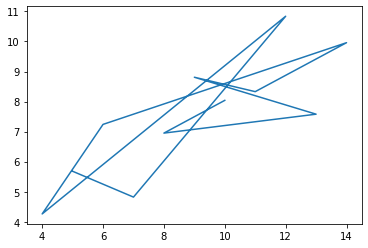

In [229]:
plt.plot(dataset_1['x'],dataset_1['y'])

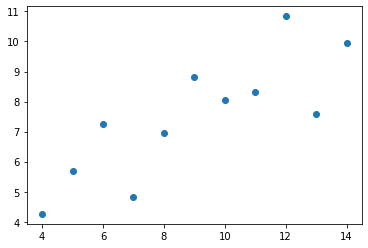

In [248]:
#스캐터차트
plt.plot(dataset_1['x'],dataset_1['y'],'o')

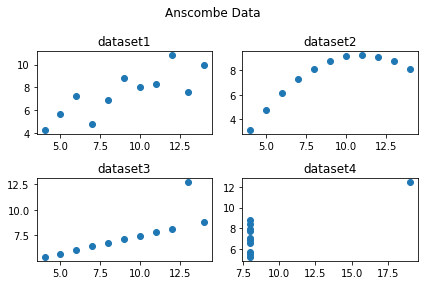

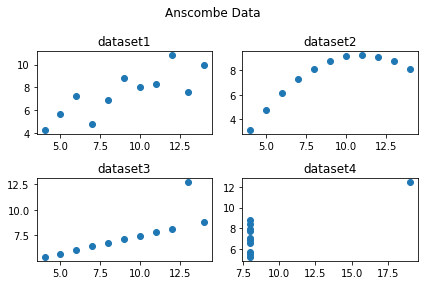

In [255]:
fig=plt.figure()
axes1=fig.add_subplot(2,2,1)   # 2x2 의 첫번째 위치
axes2=fig.add_subplot(2,2,2)
axes3=fig.add_subplot(2,2,3)
axes4=fig.add_subplot(2,2,4)

axes1.plot(dataset_1['x'],dataset_1['y'],'o')
axes2.plot(dataset_2['x'],dataset_2['y'],'o')
axes3.plot(dataset_3['x'],dataset_3['y'],'o')
axes4.plot(dataset_4['x'],dataset_4['y'],'o')

axes1.set_title('dataset1')
axes2.set_title('dataset2')
axes3.set_title('dataset3')
axes4.set_title('dataset4')

fig.suptitle('Anscombe Data')
fig.tight_layout()
fig

In [256]:
tips=sns.load_dataset('tips')

In [257]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [258]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


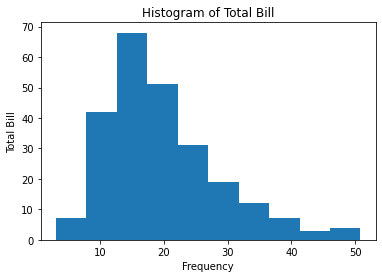

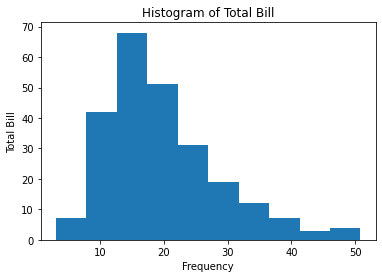

In [265]:
#히스토그램
fig=plt.figure()
axes1 = fig.add_subplot(1,1,1)

axes1.hist(tips['total_bill'],bins=10) #x축 간격
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

Text(0, 0.5, 'Tip')

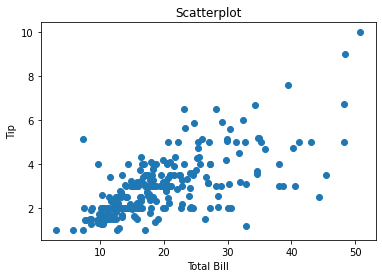

In [268]:
scatter_plot = plt.figure()
axes1=scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'],tips['tip'])
axes1.set_title('Scatterplot')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')



In [271]:
tips[tips['sex']=='Female']['tip']  #성별이 여자인 사람이 팁을 얼마나 받았는가

0      1.01
4      3.61
11     5.00
14     3.02
16     1.67
       ... 
226    2.00
229    2.88
238    4.67
240    2.00
243    3.00
Name: tip, Length: 87, dtype: float64

In [ ]:
boxplot=plt.figure()
axes1=boxplot.add_subplot(1,1,1)

axes1.boxplot(
    [tips[tips['sex']=='Female']['tip'],
    tip
])

In [272]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [273]:
'''
어플라이를 사용하기위해서는 함수를 만들어줘야함 !!
ex 성별이 들어왔을때 만약 성별이 여성이면 리턴을 0으로 하고 아니면 1로 리턴하겠다


함수로 만들기 전  tips['sex'].unique() 로 유니크한 값이 뭐가있는지 알아봐야함 여기서는 0이나 1 두가지로 반환할건데 
다른 변수가 있다면 함수만들때 다르게 해줘야하기때문에 

def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1



tips['sex'].apply(recode_sex)     < 이렇게 어플라이 해주면  'sex' 칼럼 다 바뀜 0과 1로 
'''

"\n어플라이를 사용하기위해서는 함수를 만들어줘야함 \nex 성별이 들어왔을때 만약 성별이 여성이면 리턴을 0으로 하고 아니면 1로 리턴하겠다\n\n\n\ndef recode_sex(sex):\n    if sex == 'Female':\n        return 0\n    else:\n        return 1\n\n\n\ntips['sex'].apply(recode_sex)     < 이렇게 어플라이 해주면  'sex' 칼럼 다 바뀜 0과 1로 \n"

In [274]:
tips['day'].unique()  #apply 사용하기전 유니크값이 뭐가있는지 확인 

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [275]:
### 어플라이 이용해서 day칼럼을 한글로 변경해보기

def dayday(day):
    if day == 'Sun':
        return '일요일'
    elif day== 'Sat':
        return '토요일'
    elif day== 'Thur':
        return '목요일'
    elif day == 'Fri':
        return '금요일'

tips['day'].apply(dayday)

0      일요일
1      일요일
2      일요일
3      일요일
4      일요일
      ... 
239    토요일
240    토요일
241    토요일
242    토요일
243    목요일
Name: day, Length: 244, dtype: category
Categories (4, object): ['목요일', '금요일', '토요일', '일요일']

In [277]:
tips['kor']=tips['day'].apply(dayday)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,kor
0,16.99,1.01,Female,No,Sun,Dinner,2,일요일
1,10.34,1.66,Male,No,Sun,Dinner,3,일요일
2,21.01,3.50,Male,No,Sun,Dinner,3,일요일
3,23.68,3.31,Male,No,Sun,Dinner,2,일요일
4,24.59,3.61,Female,No,Sun,Dinner,4,일요일


In [279]:
#람다 사용하기
#lambda x: x[0]
#def extract_day(day):
#  return day[0]
#같은말


tips['kor'].apply(lambda x: x[0])

0      일
1      일
2      일
3      일
4      일
      ..
239    토
240    토
241    토
242    토
243    목
Name: kor, Length: 244, dtype: category
Categories (4, object): ['목', '금', '토', '일']

In [280]:
tips['sex'].apply(lambda x : 0 if x== 'Female' else 1)
# x가 female이면 0 아니면 1



0      0
1      1
2      1
3      1
4      0
      ..
239    1
240    0
241    1
242    1
243    0
Name: sex, Length: 244, dtype: category
Categories (2, int64): [1, 0]